# Assignment 1

# Task 1

In [3]:
import os
os.getcwd()
setwd = 'Set working directory here '
os.chdir(setwd) 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import pairwise_distances
import pandas as pd
import math
import time
import seaborn as sn

In [2]:
train_in = pd.read_csv(setwd+"/train_in.csv", header=None)
train_out = pd.read_csv(setwd+"/train_out.csv", header=None)

train_in #1707 rows × 256 columns
train_out #1706 rows × 1 columns
train_out = train_out.rename(columns={0: 'digit'})

train_complete = pd.concat([train_in.reset_index(drop=True),train_out.reset_index(drop=True)], axis=1)


meandf = pd.DataFrame([train_complete.loc[train_complete['digit'] == 0].mean(axis=0)])
for i in range(1,10):
    meandf = meandf.append(pd.DataFrame([train_complete.loc[train_complete['digit'] == i].mean(axis=0)]))
    
meandf = meandf.drop(columns=['digit'])
meandf = meandf.set_index([pd.Index([i for i in range(10)])])
print(meandf) #dataframe with centers of digits. Dataframe index represents digit.


for i in range(0,10):
    print("Digit", i , "has", len(train_complete[train_complete["digit"] == i]), "images")


        0         1         2         3         4         5         6    \
0 -1.000000 -0.997524 -0.987003 -0.945918 -0.844044 -0.604991 -0.141621   
1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -0.996972 -0.661611   
2 -0.986797 -0.941292 -0.876579 -0.804203 -0.629980 -0.406213 -0.242248   
3 -1.000000 -0.989557 -0.917977 -0.728794 -0.378145 -0.045748  0.235366   
4 -1.000000 -1.000000 -1.000000 -0.984016 -0.910434 -0.855426 -0.918049   
5 -1.000000 -0.994852 -0.980898 -0.931909 -0.840636 -0.775227 -0.623273   
6 -1.000000 -1.000000 -1.000000 -1.000000 -0.997404 -0.964040 -0.875828   
7 -0.985030 -0.900476 -0.777145 -0.619380 -0.434488 -0.279331 -0.208434   
8 -0.999285 -0.974076 -0.917743 -0.822118 -0.617340 -0.278667  0.177389   
9 -1.000000 -1.000000 -1.000000 -0.995712 -0.963902 -0.791992 -0.336841   

        7         8         9    ...       246       247       248       249  \
0  0.161361  0.082251 -0.342887  ...  0.289508  0.542160  0.444213  0.022950   
1  0.510294  0

In [32]:
def calc_radia(df = train_complete):
    radia_df = pd.DataFrame(np.zeros((10,257)))
    digit = np.arange(0,10)
    for i in digit:
        distance_from_mean = np.sqrt((train_complete.loc[train_complete['digit'] == i] - meandf.iloc[i])**2) #calculate absolute difference between the mean vector of a digit and a dataframe containing all vectors from that digit from training complete
        maxofdigit = distance_from_mean.apply(max) #find maximum distance per column per digit dataframe 
        radia_df.iloc[i] = maxofdigit
        radia_df.iloc[i]
    radia_df = radia_df.iloc[:,:-1] #drop irrelevant NAN values in the last column
    return(radia_df)
radia_df = calc_radia()

radia_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000000,0.772524,1.987003,1.945918,1.844044,1.604991,1.141621,1.161361,1.082251,1.342887,...,1.289508,1.542160,1.444213,1.022950,1.507881,1.850539,1.358881,0.123734,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.137972,1.567611,1.510294,1.030044,1.438274,...,1.849389,1.166083,1.553520,1.593107,1.579258,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.152797,1.859292,1.876579,1.804203,1.629980,1.406213,1.242248,1.191307,1.360149,1.674030,...,1.530079,1.679812,1.783594,1.844733,1.850465,1.825832,1.773213,1.775074,1.641668,1.540465
3,0.000000,0.727557,1.757977,1.728794,1.378145,1.045748,1.235366,1.424603,1.419053,1.123260,...,1.333496,1.378382,1.262832,1.004893,1.308008,1.586107,1.773198,1.496282,1.100122,0.068473
4,0.000000,0.000000,0.000000,1.016016,1.703434,1.855426,1.646049,1.644639,1.780008,1.654377,...,1.792836,1.590828,1.334426,1.278828,1.600361,1.778877,1.778730,1.392664,1.254631,0.000000
5,0.000000,0.447852,0.931898,1.305909,1.840636,1.775227,1.623273,1.460739,1.328909,1.154477,...,1.110511,1.243409,1.225500,1.079545,1.225330,1.550636,1.784170,1.814341,1.464966,0.181909
6,0.000000,0.000000,0.000000,0.000000,0.389404,1.709040,1.858828,1.499066,1.055894,1.080397,...,1.374391,1.473755,1.250139,1.195086,1.643828,1.870583,1.645073,0.530026,0.000000,0.000000
7,0.784030,1.883476,1.777145,1.619380,1.434488,1.279331,1.208434,1.189855,1.090145,1.016741,...,1.316090,1.106663,1.236711,1.793783,1.743452,0.300494,0.000000,0.000000,0.000000,0.000000
8,0.102285,1.751076,1.917743,1.822118,1.617340,1.278667,1.177389,1.386562,1.290319,1.085993,...,1.050521,1.531792,1.582271,1.103076,1.547979,1.600514,1.971472,0.958299,0.001986,0.000000
9,0.000000,0.000000,0.000000,0.339712,0.937902,1.436992,1.336841,1.290121,1.661409,1.551159,...,1.613008,1.091856,1.016485,1.565197,1.767091,0.509515,1.967977,1.915379,0.677826,0.000000


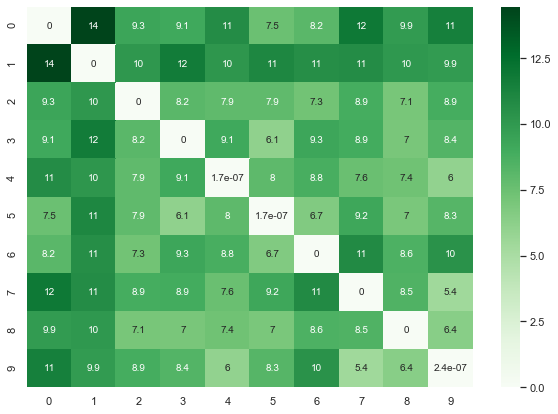

In [33]:
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(meandf, meandf) #berekent euclidean distance tussen elke vector paar van meandf
rowcol_name = np.arange(0,10) #names for row and columns 

df_distances = pd.DataFrame(distances, index = rowcol_name)

plt.figure(figsize=(10,7))
sn.set(font_scale=1) # for label size
sn.heatmap(df_distances, annot=True, annot_kws={"size": 10}, cmap="Greens") # font size
plt.show()

# TASK 2 

Euclidian classifier without scikit-learn

In [34]:
traininput = pd.read_csv(setwd+"/train_in.csv", header=None)
trainoutput = pd.read_csv(setwd+"/train_out.csv", header=None)

def classifier():
    digitlist = []
    for i in traininput.T:
        dig0 = sum(np.sqrt((traininput.iloc[i] - meandf.iloc[0])**2))
        dig1 = sum(np.sqrt((traininput.iloc[i] - meandf.iloc[1])**2))
        dig2 = sum(np.sqrt((traininput.iloc[i] - meandf.iloc[2])**2))
        dig3 = sum(np.sqrt((traininput.iloc[i] - meandf.iloc[3])**2))
        dig4 = sum(np.sqrt((traininput.iloc[i] - meandf.iloc[4])**2))
        dig5 = sum(np.sqrt((traininput.iloc[i] - meandf.iloc[5])**2))
        dig6 = sum(np.sqrt((traininput.iloc[i] - meandf.iloc[6])**2))
        dig7 = sum(np.sqrt((traininput.iloc[i] - meandf.iloc[7])**2))
        dig8 = sum(np.sqrt((traininput.iloc[i] - meandf.iloc[8])**2))
        dig9 = sum(np.sqrt((traininput.iloc[i] - meandf.iloc[9])**2))
        digit = np.argmin((dig0, dig1, dig2, dig3, dig4, dig5, dig6, dig7, dig8, dig9)) 
        digitlist.append(digit)
    return digitlist
valuetrain = classifier()

def error(class_in, output):
    errorval = sum((class_in != output.T).all()) / len(class_in) * 100
    return errorval

error(valuetrain, trainoutput)

23.432923257176334

In [35]:
testinput = pd.read_csv(setwd+"/test_in.csv", header=None)
testoutput = pd.read_csv(setwd+"/test_out.csv", header=None)

def classifier():
    digitlist = []
    for i in testinput.T:
        dig0 = sum(np.sqrt((testinput.iloc[i] - meandf.iloc[0])**2))
        dig1 = sum(np.sqrt((testinput.iloc[i] - meandf.iloc[1])**2))
        dig2 = sum(np.sqrt((testinput.iloc[i] - meandf.iloc[2])**2))
        dig3 = sum(np.sqrt((testinput.iloc[i] - meandf.iloc[3])**2))
        dig4 = sum(np.sqrt((testinput.iloc[i] - meandf.iloc[4])**2))
        dig5 = sum(np.sqrt((testinput.iloc[i] - meandf.iloc[5])**2))
        dig6 = sum(np.sqrt((testinput.iloc[i] - meandf.iloc[6])**2))
        dig7 = sum(np.sqrt((testinput.iloc[i] - meandf.iloc[7])**2))
        dig8 = sum(np.sqrt((testinput.iloc[i] - meandf.iloc[8])**2))
        dig9 = sum(np.sqrt((testinput.iloc[i] - meandf.iloc[9])**2))
        digit = np.argmin((dig0, dig1, dig2, dig3, dig4, dig5, dig6, dig7, dig8, dig9)) 
        digitlist.append(digit)
    return digitlist
valuetest = classifier()

def error(class_in, output):
    errorval = sum((class_in != output.T).all()) / len(class_in) * 100
    return errorval

error(valuetest, testoutput)

27.900000000000002

Euclidian classifier with scikit-learn

In [36]:
traininput = pd.read_csv(setwd+"/train_in.csv", header=None)
trainoutput = pd.read_csv(setwd+"/train_out.csv", header=None)

testinput = pd.read_csv(setwd+"/test_in.csv", header=None)
testoutput = pd.read_csv(setwd+"/test_out.csv", header=None)


def classifier2(train_or_test, measure='euclidean'):
    distances_from_mean = pd.DataFrame(pairwise_distances(train_or_test, meandf, metric=measure))
    classifier = distances_from_mean.T.idxmin(0)
    return classifier

classifier_train = classifier2(traininput)
classifier_test = classifier2(testinput)

def error(class_in, output):
    errorval = sum((class_in != output.T).all()) / len(class_in) * 100
    return errorval

error(classifier_train, trainoutput)

13.649677797305213

Alternative distance measures using scikit-learn

In [37]:
traininput = pd.read_csv(setwd+"/train_in.csv", header=None)
trainoutput = pd.read_csv(setwd+"/train_out.csv", header=None)

testinput = pd.read_csv(setwd+"/test_in.csv", header=None)
testoutput = pd.read_csv(setwd+"/test_out.csv", header=None)


d_measures = ["cityblock",  "cosine", "euclidean", "l1", "l2", "manhattan"] #lijst met alle measures
error_array = np.zeros((len(d_measures),2)) #lege array om errors op te slaan


for i in range(0,len(d_measures)):
    d_classifier_train = classifier2(traininput, measure = d_measures[i]) 
    d_classifier_test = classifier2(testinput, measure = d_measures[i])

    d_error_train=error(d_classifier_train, trainoutput)
    d_error_test=error(d_classifier_test, testoutput)

    d_errors = np.append(d_error_train,d_error_test)
    error_array[i] = d_errors 


error_df = pd.DataFrame(error_array, index=d_measures, columns=["train","test"])
error_df

#euclidean en l2 hebben de beste en ook dezelfde performance op zowel test als training set

,train,test
cityblock,23.432923,27.9
cosine,13.942589,20.1
euclidean,13.649678,19.6
l1,23.432923,27.9
l2,13.649678,19.6
manhattan,23.432923,27.9


Confusion matrices

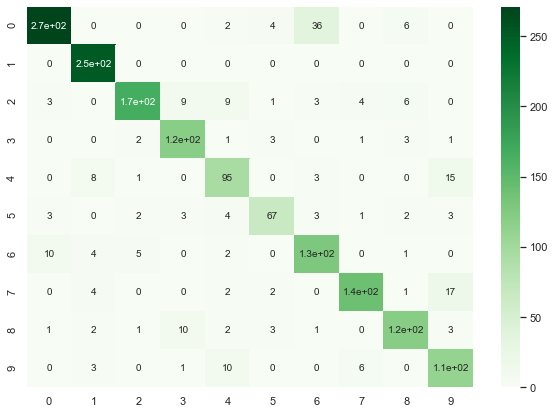

In [38]:
from sklearn.metrics import confusion_matrix
y_true = trainoutput.values.tolist()
y_pred = classifier_train
train_c_matrix = confusion_matrix(y_true, y_pred)

confmat_train = pd.DataFrame(train_c_matrix)
plt.figure(figsize=(10,7))
sn.set(font_scale=1) # for label size
sn.heatmap(confmat_train, annot=True, annot_kws={"size": 10}, cmap="Greens") # font size

plt.show()



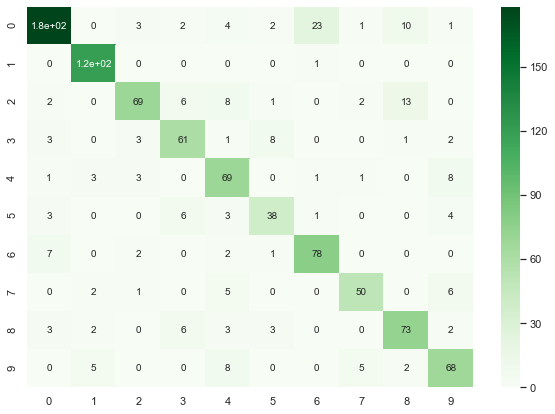

In [13]:
y_true = testoutput.values.tolist()
y_pred = classifier_test
test_c_matrix = confusion_matrix(y_true, y_pred)
pd.DataFrame(test_c_matrix)


confmat_test = pd.DataFrame(pd.DataFrame(test_c_matrix))
plt.figure(figsize=(10,7))
sn.set(font_scale=1) # for label size
sn.heatmap(confmat_test, annot=True, annot_kws={"size": 10}, cmap="Greens") # font size

plt.show()


# TASK 3 

In [39]:
training_inputs = pd.read_csv(setwd+"/train_in.csv", header=None)
training_outputs = pd.read_csv(setwd+"/train_out.csv", header=None)
test_inputs = pd.read_csv(setwd+"/test_in.csv", header=None)
test_outputs = pd.read_csv(setwd+"/test_out.csv", header=None)

training_inputs['bias'] = np.ones((len(training_inputs),1))
test_inputs['bias'] = np.ones((len(test_inputs),1))


W = np.random.random((257,10))

def outputcalc(train,weightmatrix):
    outputlayer = np.dot(train, weightmatrix)
    return outputlayer

def forwardpass(outputlayer):
    predicted = np.apply_along_axis(np.argmax, axis=1, arr=outputlayer).reshape(outputlayer.shape[0],1)
    return predicted

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)



def simple_perceptron(training_input = training_inputs, 
                      training_output = training_outputs,
                      test_input = test_inputs,
                      test_output = test_outputs,
                      seed = 2020, iterations = 10):
    
    np.random.seed(seed)
    
    W = np.random.random((257,10))
    
    training_input = np.array(training_input)
    training_output = np.array(training_output)
    
    
    j = 0
    time1 = 0
    
    while j < iterations:
        t0 = time.time()
        outputlayer_train = outputcalc(training_input, W)
        forward_train = forwardpass(outputlayer_train)
        
        outputlayer_test = outputcalc(test_input, W)
        forward_test = forwardpass(outputlayer_test)
        
        test_error = sum(forward_test == np.array(test_output))/len(test_output)
        train_error = sum(forward_train == np.array(training_output))/len(training_output)
        if train_error == 1:
            print("that took " + str(j) + " iterations and " + str(time1) + " seconds")
            break      
        error = training_output - forward_train  #what indices are wrong
        where_wrong_index = np.where(error != 0)[0] #de indices van de verkeerde digits

        for i in range(len(forward_train)):
            if i in where_wrong_index:
                index = np.where(outputlayer_train[i] > outputlayer_train[0][forward_train[i]])[0]     
                W[:,index] = W[:,index] - np.array([training_input[i],]*len(index)).T #verkeerde digit - training input
                W[:,int(training_output[i])] = W[:,int(training_output[i])] + training_input[i] #digit die het had moeten zijn + training input
       
        t1 = time.time()
        time1 = time1 + (t1-t0)
        
        j = j + 1
        
    return_list = [j,  float(train_error), float(test_error), time1]
    return return_list

simple_perceptron(iterations = 1000)




that took 399 iterations and 8.884318351745605 seconds


[399, 1.0, 0.846, 8.884318351745605]

In [ ]:
df = pd.DataFrame(np.ones((100,4)), columns = ['iterations to converge', 'train error', 'test error', 'time'])
for i in range(100):
    df.iloc[i] = simple_perceptron(iterations = 1000, seed = i)
    print(i)
print(df)

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)
hist_i = df['iterations to converge']
print(np.mean(hist_i))
print(np.std(hist_i))

that took 466 iterations and 10.053398609161377 seconds
0
that took 233 iterations and 4.935733318328857 seconds
1
that took 406 iterations and 8.720659732818604 seconds
2
that took 458 iterations and 9.703190803527832 seconds
3
that took 450 iterations and 9.584914684295654 seconds
4
that took 479 iterations and 9.858787059783936 seconds
5
that took 415 iterations and 8.897326707839966 seconds
6
that took 369 iterations and 8.02723503112793 seconds
7
that took 327 iterations and 6.988577604293823 seconds
8
that took 403 iterations and 8.422240495681763 seconds
9
that took 485 iterations and 10.277998208999634 seconds
10
that took 278 iterations and 5.974073171615601 seconds
11
that took 331 iterations and 7.487450122833252 seconds
12
that took 409 iterations and 9.047341108322144 seconds
13


Task 3 Géron equation

In [40]:
def simple_perceptron2(training_input = training_inputs, 
                      training_output = training_outputs,
                      test_input = test_inputs,
                      test_output = test_outputs,
                      seed = 2020, iterations = 10):
    
    np.random.seed(seed)
    
    W = np.random.random((257,10))
    
    training_input = np.array(training_input)
    training_output = np.array(training_output)
    
    
    j = 0
    time1 = 0
    
    while j < iterations:
        t0 = time.time()
        outputlayer_train = outputcalc(training_input, W)
        forward_train = forwardpass(outputlayer_train)
        
        outputlayer_test = outputcalc(test_input, W)
        forward_test = forwardpass(outputlayer_test)
        
        test_error = sum(forward_test == np.array(test_output))/len(test_output)
        train_error = sum(forward_train == np.array(training_output))/len(training_output)
        if train_error == 1:
            print("that took " + str(j) + " iterations and " + str(time1) + " seconds")
            break      
        error = training_output - forward_train  #what indices are wrong
        where_wrong_index = np.where(error != 0)[0] #de indices van de verkeerde digits

        for i in range(len(forward_train)):
            if i in where_wrong_index:
                W[:,int(forward_train[i])] = W[:,int(forward_train[i])] + ((int(training_output[i]) -  int(forward_train[i])) *training_input[i])
        t1 = time.time()
                
                
                

        time1 = time1 + (t1-t0)
        j = j + 1
    return_list = [j,  float(train_error), float(test_error), time1]
    return return_list

simple_perceptron2(iterations = 10)





[10, 0.14938488576449913, 0.125, 0.42204761505126953]

# Task 4

In [9]:
df = training_outputs


index_list = [] #list of indices for pair ij 
what_index = [] #list with all pairs as string to see what row of index_list is which pair 
for i in range(10):
    index_i = (np.where(df == i)[0])
    for j in range(10):
        if i != j:
            what_index.append(str(i) + ' and ' + str(j))
            index_j = (np.where(df == j)[0])
            index_ij = (np.append(index_i, index_j))
            index_list.append(index_ij)
            

error_list = []
for i in range(len(what_index)):
    t0 = time.time()
    print(i)
    error = simple_perceptron(training_input = training_inputs.loc[index_list[i]], 
                      training_output = training_outputs.loc[index_list[i]],
                             seed = 2021, iterations = 300)
    print(time.time()-t0)
    print(error)
    error_list.append(error)
    
df = pd.DataFrame(error_list, index = what_index)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 90)
df.sort_values(by=0, ascending=False)
print(df)

0
that took 28 iterations and 0.34258604049682617 seconds
0.353527307510376
[28, 1.0, 0.34, 0.34258604049682617]
1
that took 42 iterations and 0.4331085681915283 seconds
0.44484758377075195
[42, 1.0, 0.314, 0.4331085681915283]
2
that took 28 iterations and 0.27214932441711426 seconds
0.28111720085144043
[28, 1.0, 0.289, 0.27214932441711426]
3
that took 60 iterations and 0.5631520748138428 seconds
0.5731401443481445
[60, 1.0, 0.306, 0.5631520748138428]
4
that took 23 iterations and 0.22871947288513184 seconds
0.23669815063476562
[23, 1.0, 0.268, 0.22871947288513184]
5
that took 23 iterations and 0.24660873413085938 seconds
0.25513195991516113
[23, 1.0, 0.305, 0.24660873413085938]
6
that took 26 iterations and 0.25986170768737793 seconds
0.269956111907959
[26, 1.0, 0.284, 0.25986170768737793]
7
that took 33 iterations and 0.3262512683868408 seconds
0.3352324962615967
[33, 1.0, 0.306, 0.3262512683868408]
8
that took 37 iterations and 0.35262632369995117 seconds
0.36272454261779785
[37, 1.

,0,1,2,3
2 and 4,114,1.0,0.181,0.951074
4 and 2,106,1.0,0.180,0.988550
9 and 7,99,1.0,0.141,0.805316
4 and 6,66,1.0,0.171,0.546022
7 and 9,65,1.0,0.140,0.550258
7 and 2,64,1.0,0.161,0.621180
0 and 4,60,1.0,0.306,0.563152
2 and 7,56,1.0,0.161,0.488679
6 and 1,56,1.0,0.207,0.515349
1 and 6,54,1.0,0.207,0.476767


Task 4 part II

In [6]:
outputs_i_list = []
what_index = []

for i in range(10):
    what_index.append(str(i) + " the rest")
    outputs_i = np.array(training_outputs)
    index_not = np.where(outputs_i != i)[0]
    outputs_i[np.where(outputs_i == i)[0]] = 1
    outputs_i[index_not] = 0 

    outputs_i_list.append(outputs_i)
    
error_list = []
for i in range(len(what_index)):
    t0 = time.time()
    print(i)
    error = simple_perceptron(training_input = training_inputs, 
                      training_output = outputs_i_list[i],
                      seed = 2020, iterations = 2000)
    print(time.time()-t0)
    print(error)
    error_list.append(error)

df = pd.DataFrame(error_list, index = what_index, columns = ['iterations to converge', 'train error', 'test error', 'time'])
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 90)
print(df)

0
that took 186 iterations and 3.7076027393341064 seconds
3.723560094833374
[186, 1.0, 0.018, 3.7076027393341064]
1
that took 108 iterations and 2.3003947734832764 seconds
2.3153538703918457
[108, 1.0, 0.34, 2.3003947734832764]
2
that took 531 iterations and 13.019872426986694 seconds
13.036341190338135
[531, 1.0, 0.219, 13.019872426986694]
3
that took 245 iterations and 5.03668212890625 seconds
5.058661460876465
[245, 1.0, 0.223, 5.03668212890625]
4
that took 694 iterations and 15.559211015701294 seconds
15.576167106628418
[694, 1.0, 0.222, 15.559211015701294]
5
that took 173 iterations and 3.7571964263916016 seconds
3.7731542587280273
[173, 1.0, 0.223, 3.7571964263916016]
6
that took 158 iterations and 3.251727819442749 seconds
3.266688585281372
[158, 1.0, 0.226, 3.251727819442749]
7
that took 252 iterations and 5.108941316604614 seconds
5.1259284019470215
[252, 1.0, 0.225, 5.108941316604614]
8
that took 405 iterations and 8.613308906555176 seconds
8.628633737564087
[405, 1.0, 0.223,

In [7]:
print(df)

           iterations to converge  train error  test error       time
0 de rest                     186          1.0       0.018   3.707603
1 de rest                     108          1.0       0.340   2.300395
2 de rest                     531          1.0       0.219  13.019872
3 de rest                     245          1.0       0.223   5.036682
4 de rest                     694          1.0       0.222  15.559211
5 de rest                     173          1.0       0.223   3.757196
6 de rest                     158          1.0       0.226   3.251728
7 de rest                     252          1.0       0.225   5.108941
8 de rest                     405          1.0       0.223   8.613309
9 de rest                     302          1.0       0.224   6.511528


# Task 5

5.1

In [3]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def relu(x):
    return np.maximum(x, 0, x)

def relu_derivative(x):
    if x > 0:
        return 1
    else:
        return 0

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def tanh_derivative(x):
    return 1-tanh(x)**2

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]])

d = np.array([
    [0],
    [1],
    [1],
    [0]])

In [4]:
def xor_net(x1, x2, weights):
    x_layer = np.array([[1],[x1],[x2]]) #3x1 vector
    x_layer_trans = x_layer.T #1x3 vector
    
    w012345 = np.array(weights[:6]).reshape(3,2, order='F') #3x2 vector
    w678 = weights[6:] #1x3 vector
    
    net1 = np.dot(x_layer_trans, w012345) #1x2 vector
    net1_trans = net1.T #2x1 vector
    
    bias = np.ones((1, 1))
    net1_layer = np.concatenate((bias, net1_trans), axis = 0) #3x1 vector
    
    sig_net1 = sigmoid(net1) #1x2 vector
    sig_net1_trans = sig_net1.T #2x1 vector
    
    sig_net1_layer = np.concatenate((bias, sig_net1_trans), axis = 0) #3x1 vector
    sig_net1_layer_trans = sig_net1_layer.T #1x3 vector
    net2 = np.dot(sig_net1_layer_trans, w678)
    sig_net2 = sigmoid(net2)
    return (sig_net2, net2, net1_layer, x_layer) 

5.2

In [5]:
def mse(weights):
    xorlist = []
    for i in range(len(X)):
        xornetwork = xor_net(X[i][0], X[i][1], weights)[0]
        xorlist.append(xornetwork)
    errorlist = []    
    for i in range(len(xorlist)):
        error = (d[i] - xorlist[i])**2
        errorlist.append(error)
    mse = sum(errorlist)/len(X)       
    return (mse)

5.3

In [7]:
def gradient(x1, x2, d, weights):
    nn_out = xor_net(x1, x2, weights)
    gradient_w678 = np.dot((nn_out[0]-d)*sigmoid_derivative(nn_out[1]),nn_out[2].T)[0]
    gradient_w012 = np.dot((nn_out[0]-d)*sigmoid_derivative(nn_out[1])*sigmoid_derivative(nn_out[2][1])*weights[7],nn_out[3].T)[0]
    gradient_w345 = np.dot((nn_out[0]-d)*sigmoid_derivative(nn_out[1])*sigmoid_derivative(nn_out[2][2])*weights[8],nn_out[3].T)[0]
    gradient_w = np.concatenate((gradient_w012, gradient_w345, gradient_w678), axis = 0).reshape((9,1))
    return gradient_w

5.4

In [8]:
def gradient_desc(iterations, learning_rate, weights, j=0):
    mselist = []
    missclasslist = []
    while j < iterations:
        delta_weights = np.zeros((9,1))
        for i in range(len(X)):
            delta_weights = delta_weights + learning_rate*gradient(X[i][0],X[i][1],d[i],weights)
            if (i == 0):
                if (float(xor_net(X[i][0], X[i][1], weights)[0])<0.5):
                    missclasslist.append(0)
                else:
                    missclasslist.append(1)
            if (i == 1):
                if (float(xor_net(X[i][0], X[i][1], weights)[0])>0.5):
                    missclasslist.append(0)
                else:
                    missclasslist.append(1)
            if (i == 2):
                if (float(xor_net(X[i][0], X[i][1], weights)[0])>0.5):
                    missclasslist.append(0)
                else:
                    missclasslist.append(1)
            if (i == 3):
                if(float(xor_net(X[i][0], X[i][1], weights)[0])<0.5):
                    missclasslist.append(0)
                else:
                    missclasslist.append(1)
        weights = weights-delta_weights
        mselist.append(mse(weights)[0][0])
        j+=1
    return(mse(weights), mselist, missclasslist)

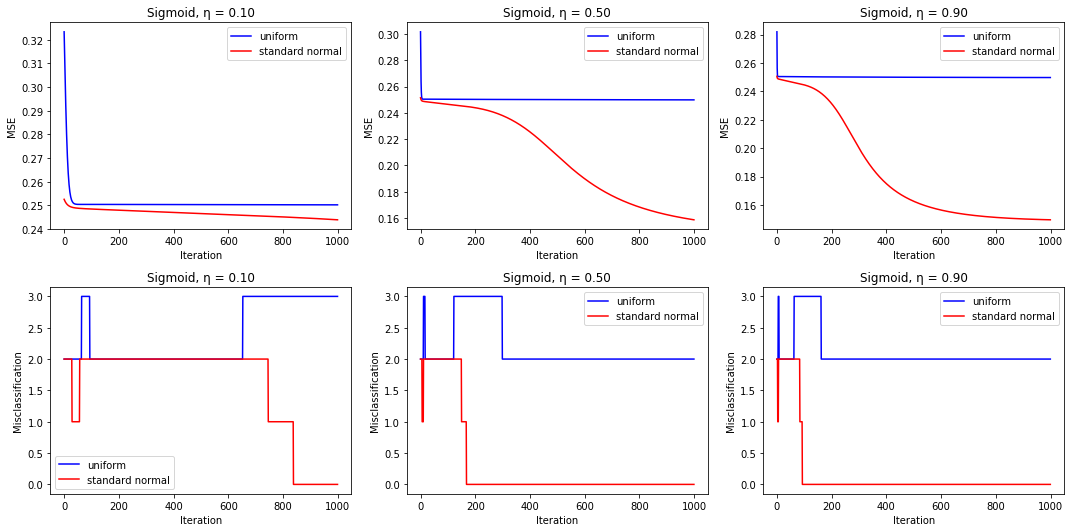

In [9]:
#Sigmoid
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15, 7.5))

np.random.seed(seed=20)
axs[0,0].plot(list(range(1000)), gradient_desc(1000, 0.10, np.random.rand(9,1))[1], color="blue", label="uniform")
np.random.seed(seed=20)
axs[0,0].plot(list(range(1000)), gradient_desc(1000, 0.10, np.random.normal(loc=0.0, scale=1.0, size=(9,1)))[1], color="red", label="standard normal")
axs[0,0].set_title("Sigmoid, \u03B7 = 0.10")
axs[0,0].set_ylabel('MSE')
axs[0,0].set_xlabel('Iteration')
axs[0,0].legend()

np.random.seed(seed=20)
axs[0,1].plot(list(range(1000)), gradient_desc(1000, 0.50, np.random.rand(9,1))[1], color="blue", label="uniform")
np.random.seed(seed=20)
axs[0,1].plot(list(range(1000)), gradient_desc(1000, 0.50, np.random.normal(loc=0.0, scale=1.0, size=(9,1)))[1], color="red", label="standard normal")
axs[0,1].set_title("Sigmoid, \u03B7 = 0.50")
axs[0,1].set_ylabel('MSE')
axs[0,1].set_xlabel('Iteration')
axs[0,1].legend()

np.random.seed(seed=20)
axs[0,2].plot(list(range(1000)), gradient_desc(1000, 0.90, np.random.rand(9,1))[1], color="blue", label="uniform")
np.random.seed(seed=20)
axs[0,2].plot(list(range(1000)), gradient_desc(1000, 0.90, np.random.normal(loc=0.0, scale=1.0, size=(9,1)))[1], color="red", label="standard normal")
axs[0,2].set_title("Sigmoid, \u03B7 = 0.90")
axs[0,2].set_ylabel('MSE')
axs[0,2].set_xlabel('Iteration')
axs[0,2].legend()

np.random.seed(seed=20)
missclasslist = gradient_desc(1000, 0.10, np.random.rand(9,1))[2]
missclasslistsum = np.add.reduceat(missclasslist, np.arange(0, len(missclasslist), 4))
axs[1,0].plot(list(range(1000)), missclasslistsum, color="blue", label="uniform")
np.random.seed(seed=20)
missclasslistnorm = gradient_desc(1000, 0.10, np.random.normal(loc=0.0, scale=1.0, size=(9,1)))[2]
missclasslistnormsum = np.add.reduceat(missclasslistnorm, np.arange(0, len(missclasslistnorm), 4))
axs[1,0].plot(list(range(1000)), missclasslistnormsum, color="red", label="standard normal")
axs[1,0].set_title("Sigmoid, \u03B7 = 0.10")
axs[1,0].set_ylabel('Misclassification')
axs[1,0].set_xlabel('Iteration')
axs[1,0].legend()

np.random.seed(seed=20)
missclasslist = gradient_desc(1000, 0.50, np.random.rand(9,1))[2]
missclasslistsum = np.add.reduceat(missclasslist, np.arange(0, len(missclasslist), 4))
axs[1,1].plot(list(range(1000)), missclasslistsum, color="blue", label="uniform")
np.random.seed(seed=20)
missclasslistnorm = gradient_desc(1000, 0.50, np.random.normal(loc=0.0, scale=1.0, size=(9,1)))[2]
missclasslistnormsum = np.add.reduceat(missclasslistnorm, np.arange(0, len(missclasslistnorm), 4))
axs[1,1].plot(list(range(1000)), missclasslistnormsum, color="red", label="standard normal")
axs[1,1].set_title("Sigmoid, \u03B7 = 0.50")
axs[1,1].set_ylabel('Misclassification')
axs[1,1].set_xlabel('Iteration')
axs[1,1].legend()

np.random.seed(seed=20)
missclasslist = gradient_desc(1000, 0.90, np.random.rand(9,1))[2]
missclasslistsum = np.add.reduceat(missclasslist, np.arange(0, len(missclasslist), 4))
axs[1,2].plot(list(range(1000)), missclasslistsum, color="blue", label="uniform")
np.random.seed(seed=20)
missclasslistnorm = gradient_desc(1000, 0.90, np.random.normal(loc=0.0, scale=1.0, size=(9,1)))[2]
missclasslistnormsum = np.add.reduceat(missclasslistnorm, np.arange(0, len(missclasslistnorm), 4))
axs[1,2].plot(list(range(1000)), missclasslistnormsum, color="red", label="standard normal")
axs[1,2].set_title("Sigmoid, \u03B7 = 0.90")
axs[1,2].set_ylabel('Misclassification')
axs[1,2].set_xlabel('Iteration')
axs[1,2].legend()

plt.tight_layout()

Lazy Approach: Depends heavily on the distribution from which is being sampled for the weights. Random samples from uniform distribution never converge to a set of correctly classifying weights, whilst random samples from a normal distribution with mean 0 and standard deviation 1 (standard normal) converge after only a handful (not more than 6) randomizations. Sometimes correct classification is even reached at the first set of weights for the standard normal.

In [10]:
counter = 0
outarray = np.zeros((4,1))
while np.array_equal(d, outarray) == False:
    weights = np.random.normal(loc=0.0, scale=1.0, size=(9,1)) # or use np.random.rand(9,1)
    for i in range(len(X)):
        if (i == 0):
            if (float(xor_net(X[i][0], X[i][1], weights)[0])<0.5):
                outarray[i] = 0
            else:
                outarray[i] = 1
        if (i == 1):
            if (float(xor_net(X[i][0], X[i][1], weights)[0])>0.5):
                outarray[i] = 0
            else:
                outarray[i] = 1
        if (i == 2):
            if (float(xor_net(X[i][0], X[i][1], weights)[0])>0.5):
                outarray[i] = 0
            else:
                outarray[i] = 1
        if (i == 3):
            if(float(xor_net(X[i][0], X[i][1], weights)[0])<0.5):
                outarray[i] = 0
            else:
                outarray[i] = 1
    outarray = outarray.astype(int)
    counter+=1
counter

2

Relu and tanh functions, comment out the xor_net and gradient functions under 5.1 and 5.3 respectively when using either of these functions.

In [ ]:
# def xor_net(x1, x2, weights):
#     x_layer = np.array([[1],[x1],[x2]]) #3x1 vector
#     x_layer_trans = x_layer.T #1x3 vector
    
#     w012345 = np.array(weights[:6]).reshape(3,2, order='F') #3x2 vector
#     w678 = weights[6:] #1x3 vector
    
#     net1 = np.dot(x_layer_trans, w012345) #1x2 vector
#     net1_trans = net1.T #2x1 vector
    
#     bias = np.ones((1, 1))
#     net1_layer = np.concatenate((bias, net1_trans), axis = 0) #3x1 vector
    
#     sig_net1 = relu(net1) #1x2 vector
#     sig_net1_trans = sig_net1.T #2x1 vector
    
#     sig_net1_layer = np.concatenate((bias, sig_net1_trans), axis = 0) #3x1 vector
#     sig_net1_layer_trans = sig_net1_layer.T #1x3 vector
#     net2 = np.dot(sig_net1_layer_trans, w678)
#     sig_net2 = relu(net2)
#     return (sig_net2, net2, net1_layer, x_layer) 

In [ ]:
# def gradient(x1, x2, d, weights):
#     nn_out = xor_net(x1, x2, weights)
#     gradient_w678 = np.dot((nn_out[0]-d)*relu_derivative(nn_out[1]),nn_out[2].T)[0]
#     gradient_w012 = np.dot((nn_out[0]-d)*relu_derivative(nn_out[1])*relu_derivative(nn_out[2][1])*weights[7],nn_out[3].T)[0]
#     gradient_w345 = np.dot((nn_out[0]-d)*relu_derivative(nn_out[1])*relu_derivative(nn_out[2][2])*weights[8],nn_out[3].T)[0]
#     gradient_w = np.concatenate((gradient_w012, gradient_w345, gradient_w678), axis = 0).reshape((9,1))
#     return gradient_w

In [ ]:
# def xor_net(x1, x2, weights):
#     x_layer = np.array([[1],[x1],[x2]]) #3x1 vector
#     x_layer_trans = x_layer.T #1x3 vector
    
#     w012345 = np.array(weights[:6]).reshape(3,2, order='F') #3x2 vector
#     w678 = weights[6:] #1x3 vector
    
#     net1 = np.dot(x_layer_trans, w012345) #1x2 vector
#     net1_trans = net1.T #2x1 vector
    
#     bias = np.ones((1, 1))
#     net1_layer = np.concatenate((bias, net1_trans), axis = 0) #3x1 vector
    
#     sig_net1 = tanh(net1) #1x2 vector
#     sig_net1_trans = sig_net1.T #2x1 vector
    
#     sig_net1_layer = np.concatenate((bias, sig_net1_trans), axis = 0) #3x1 vector
#     sig_net1_layer_trans = sig_net1_layer.T #1x3 vector
#     net2 = np.dot(sig_net1_layer_trans, w678)
#     sig_net2 = tanh(net2)
#     return (sig_net2, net2, net1_layer, x_layer) 

In [ ]:
# def gradient(x1, x2, d, weights):
#     nn_out = xor_net(x1, x2, weights)
#     gradient_w678 = np.dot((nn_out[0]-d)*tanh_derivative(nn_out[1]),nn_out[2].T)[0]
#     gradient_w012 = np.dot((nn_out[0]-d)*tanh_derivative(nn_out[1])*tanh_derivative(nn_out[2][1])*weights[7],nn_out[3].T)[0]
#     gradient_w345 = np.dot((nn_out[0]-d)*tanh_derivative(nn_out[1])*tanh_derivative(nn_out[2][2])*weights[8],nn_out[3].T)[0]
#     gradient_w = np.concatenate((gradient_w012, gradient_w345, gradient_w678), axis = 0).reshape((9,1))
#     return gradient_w